## sklearn中的降维算法

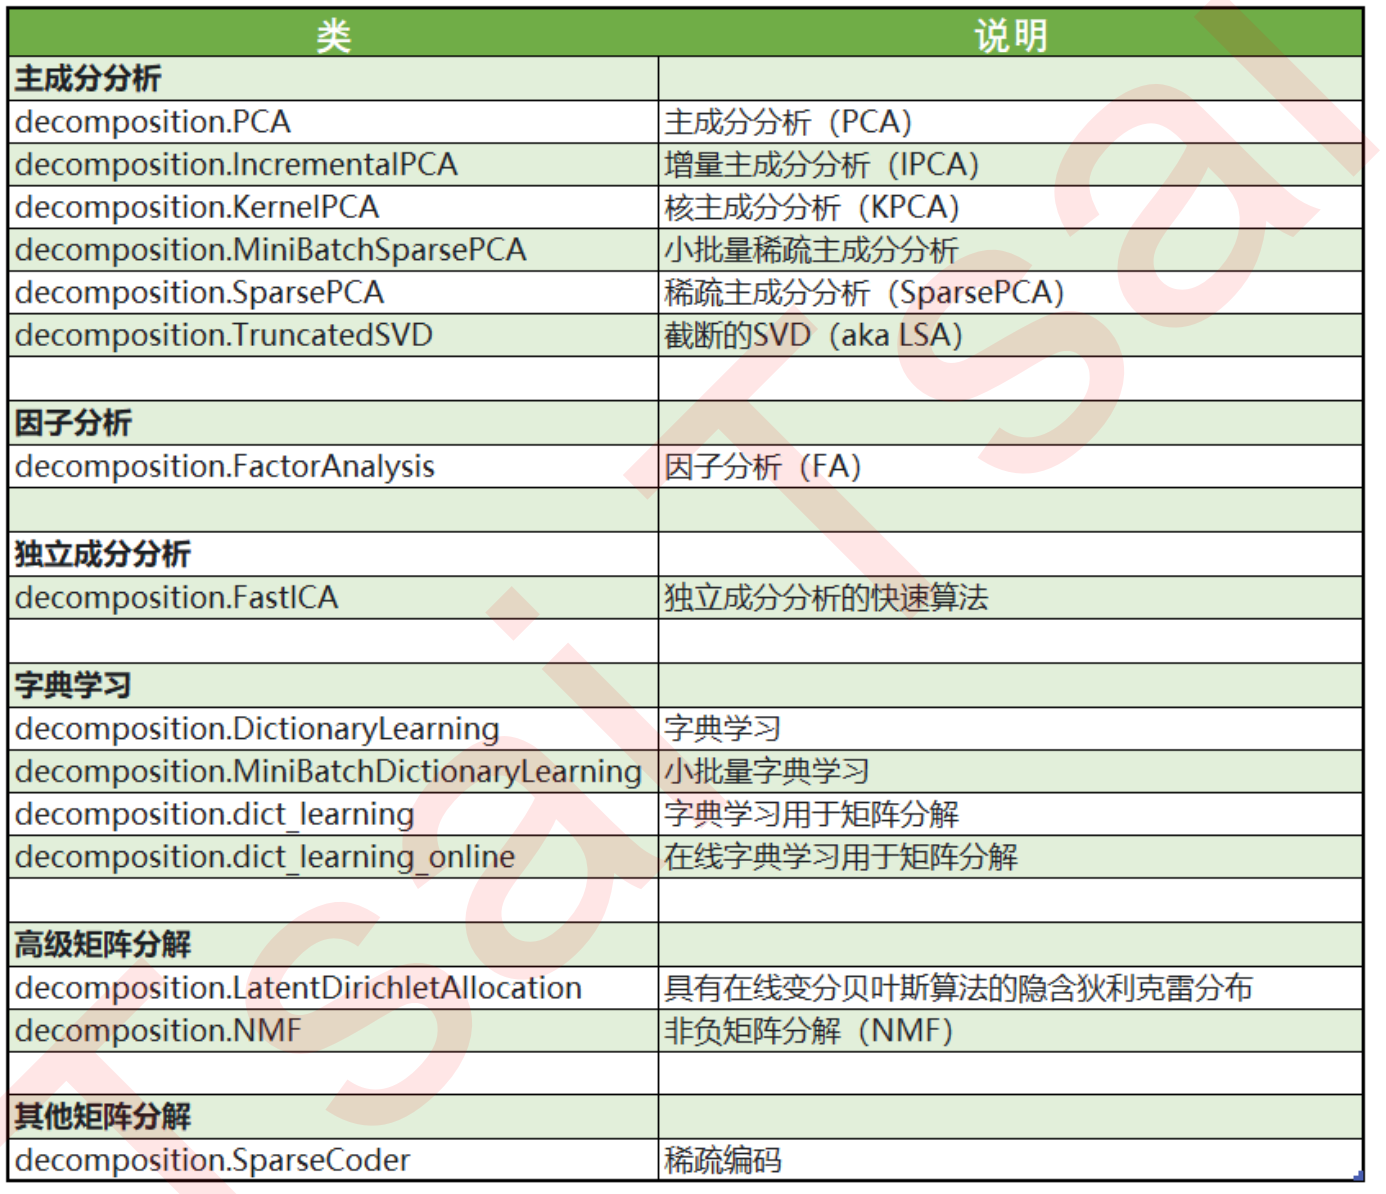

# PCA与SVD

>降维的原理是可以减少特征的数量，删除一些不必要的特征，**保留那些信息量大的特征(或者说特征的线性变换)**，从而保留大部分有效信息。主要通过将那些含有重复信息的特征合并，删除一些无效的信息特征等实现，最终形成的特征矩阵含有原先矩阵的大部分信息，而且其特征的数量大大减少。

如果我们把特征矩阵通过降维到2维数据，我们就可以将数据可视化。

## PCA  
我们已经学过一种特征过滤的方法：方差过滤---把那些方差小(意味着数据可能相同)的特征删除。PCA(主成分分析)就是基于方差实现的。  
如果一个特征的方差很大，那就说明它含有的信息量很多。因此，在降维算法中，PCA使用的信息衡量指标是**样本方差**，又称做**可解释性方差。**

```
Init signature:
PCA(
    n_components=None,
    copy=True,
    whiten=False,
    svd_solver='auto',
    tol=0.0,
    iterated_power='auto',
    random_state=None,
)
```

通过下面的示例来解释：  
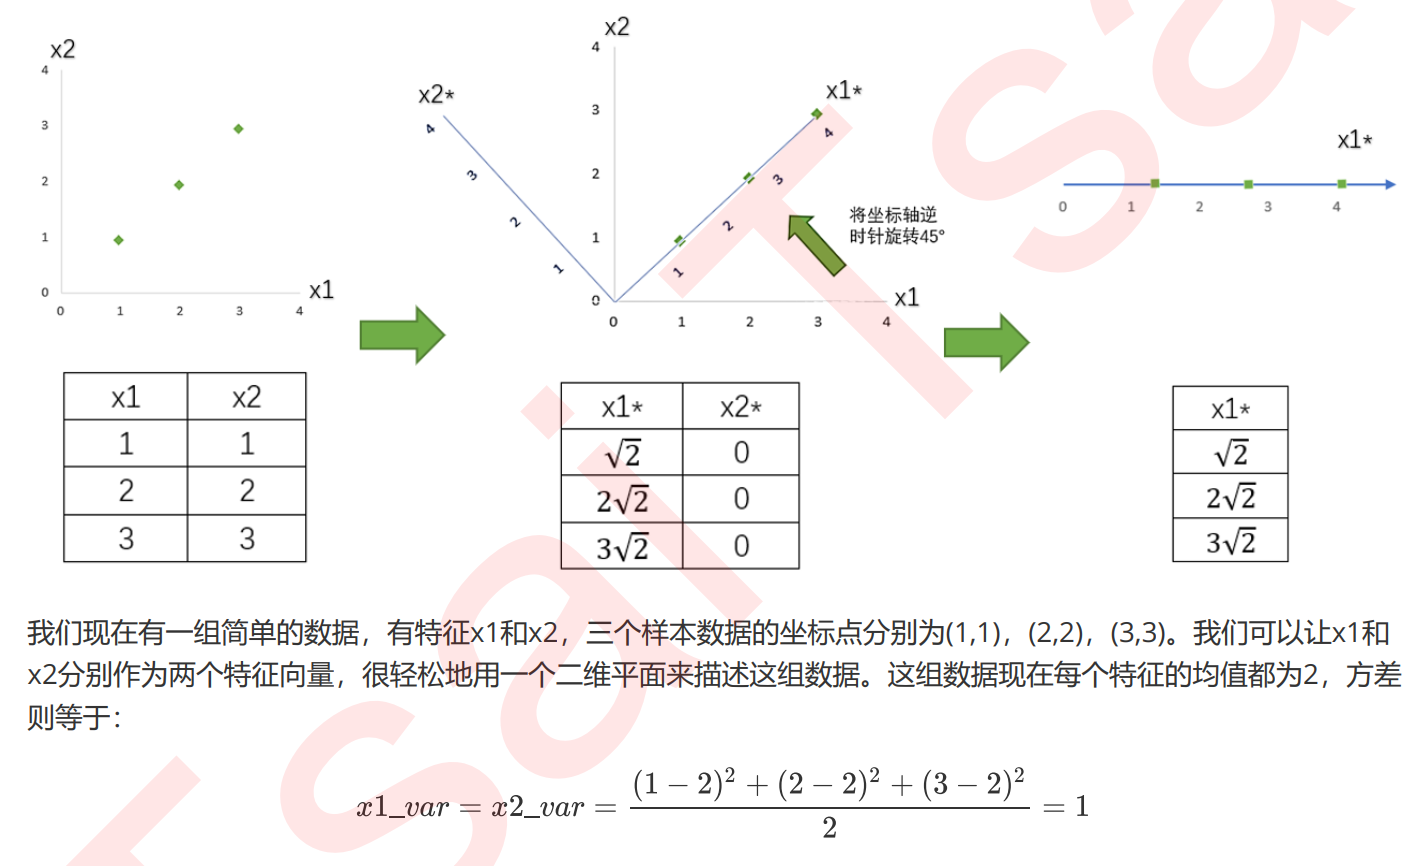

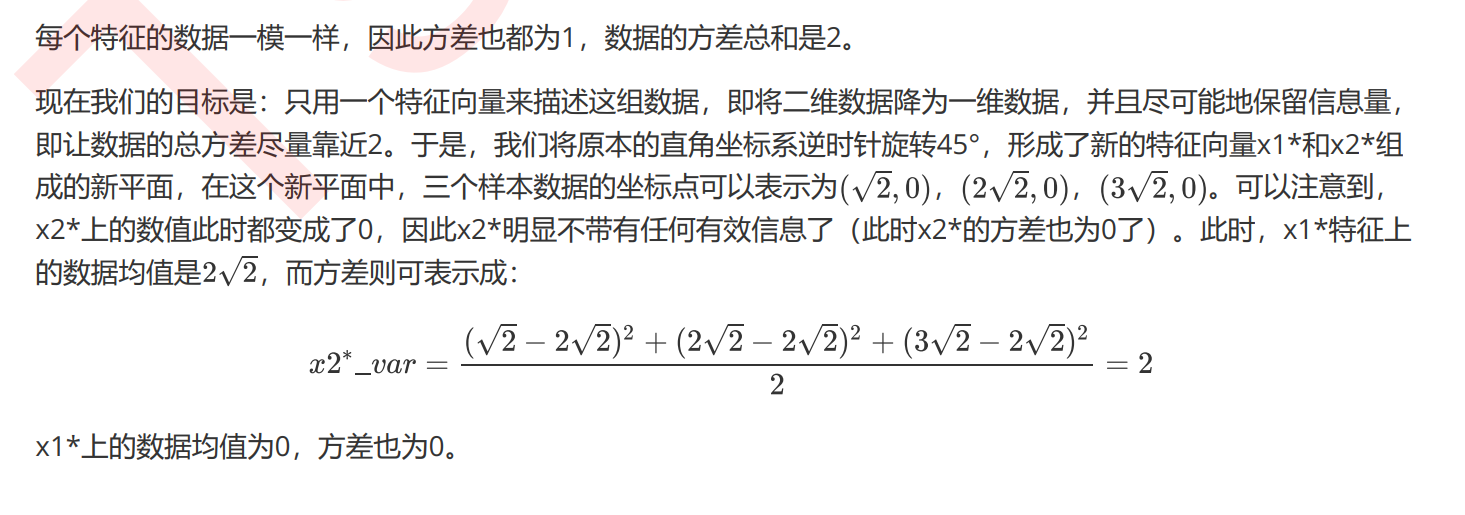

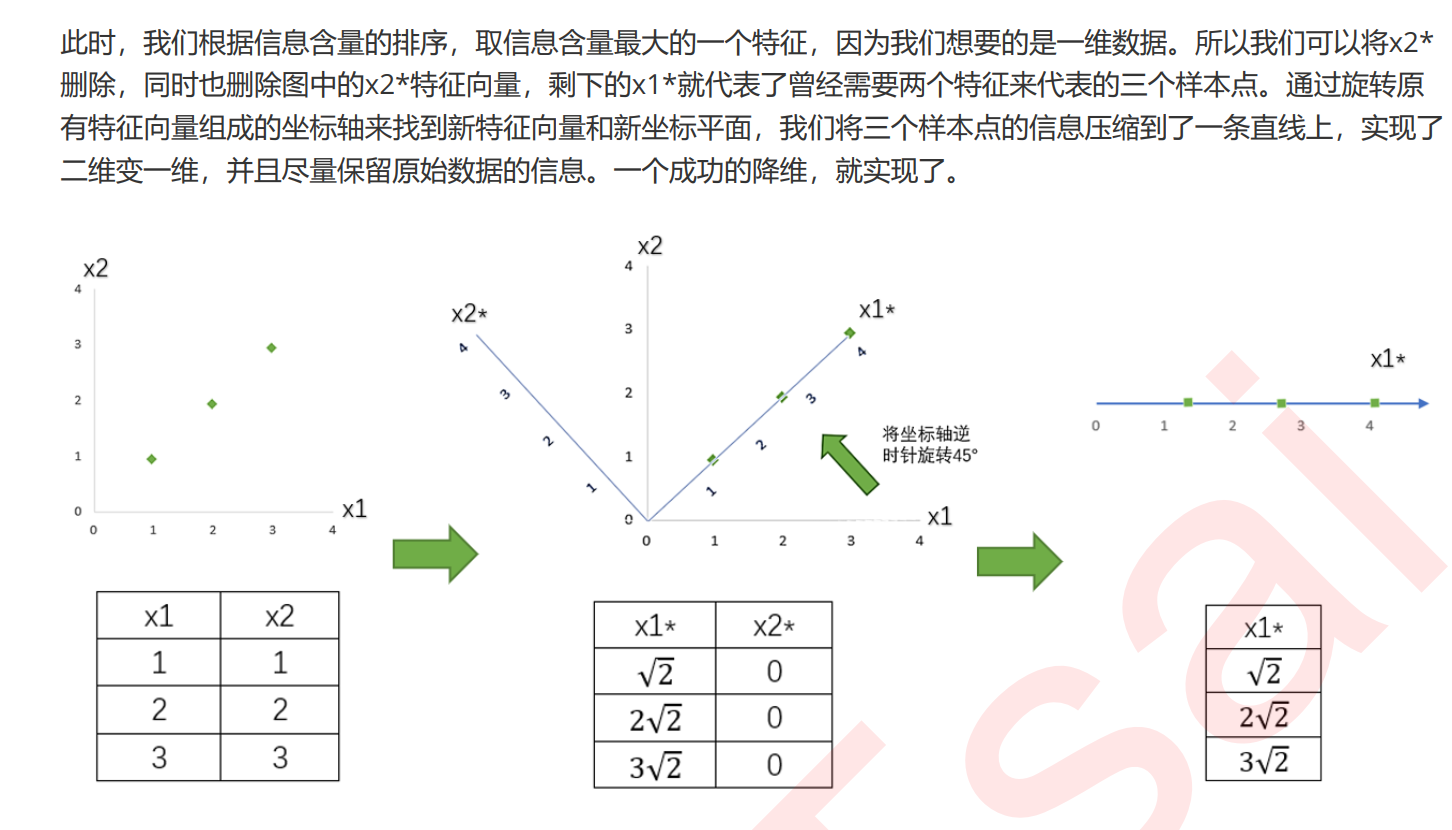

降维算法的主要步骤：  


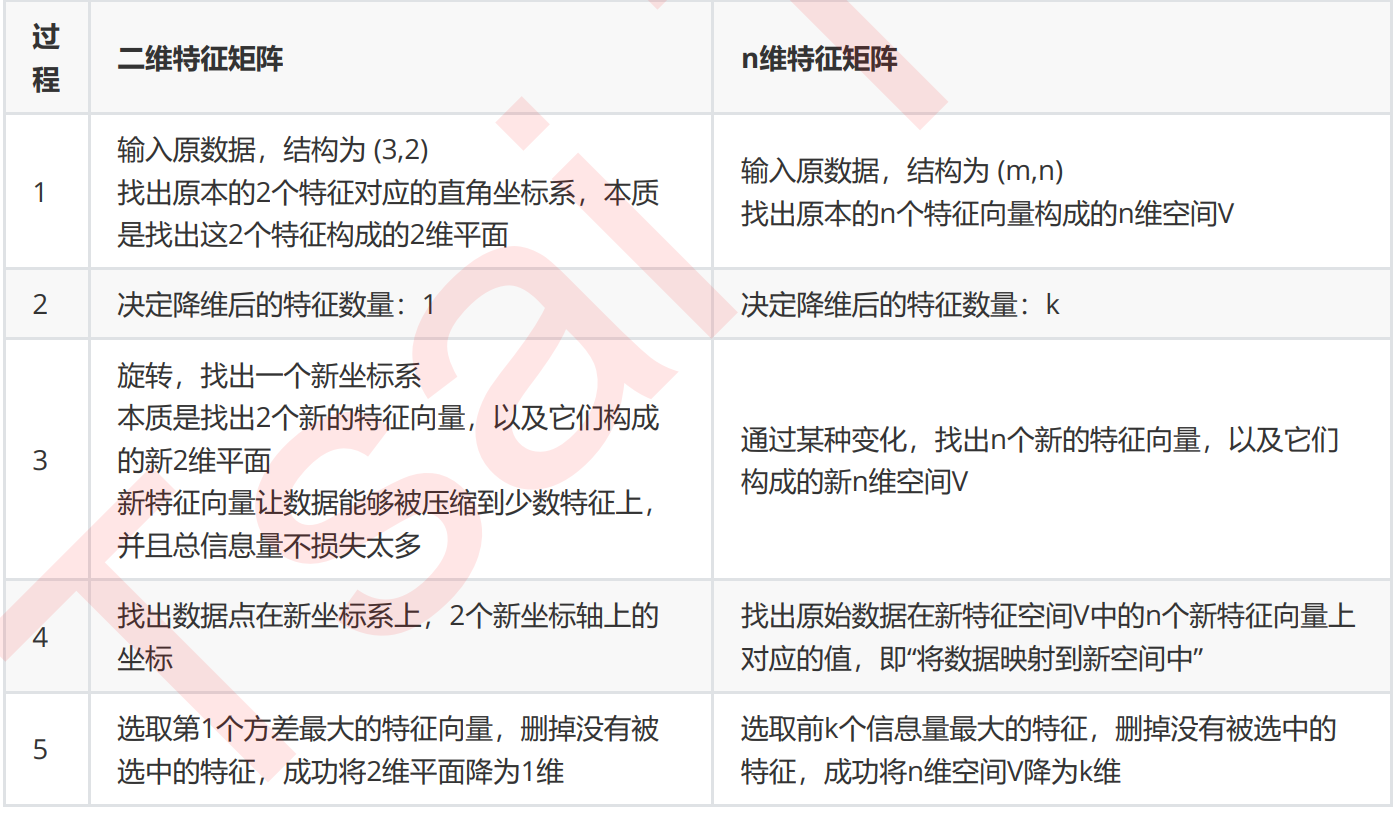

步骤3使用的技术就是矩阵分解，其大概的算法如下：  
1. 产生一个协方差矩阵(对称阵)$\dfrac{1}{n}X^TX$
2. 对协方差矩阵进行正交分解(奇异值分解？)，产生$Q\Sigma Q^{-1}$，其中$\Sigma$是一个对角阵，其对角线上的元素就是方差。  
3. 对其按照方差大小进行排序，根据我们的需求选出前k个列向量，在进行$Q\Sigma^{k} Q^{-1}$，转换成我们想要的特征矩阵

PCA找到的每个新特征向量称为**主成分**，被丢弃的特征向量被认为是信息量很少，或者说就是噪音。  
但是，从PCA算法实现来看，变换后新的特征矩阵与原来的特征矩阵虽然含有原来特征矩阵的大部分信息，**但是我们根本无法从新的特征矩阵中看出与原来特征矩阵的关系。(也就是说，原来的特性含有的关系被破坏了。如，年龄28，性别男等这些信息，我们无法从新的特征矩阵中看出来)**

而使用奇异值分解(SVD)找出U,Σ,V，使得$X = U\Sigma V^T$。  
无论是PCA或者SVD都需要遍历所有的特征和样本来计算信息量指标。并且在矩阵分解的过程之中，
会产生比原来的特征矩阵更大的矩阵，比如原数据的结构是(m,n)，在矩阵分解中为了找出最佳新特征空间V，可能
需要产生(n,n)，(m,m)大小的矩阵，还需要产生协方差矩阵去计算更多的信息。 所以很耗费很大的运行时间。

PCA和特征选择技术都是特征工程的一部分，它们有什么不同？

特征工程中有三种方式：特征提取，特征创造和特征选择。  
特征选择是从已存在的特征中选取携带信息最多的，**选完之后的特征依然具有可解释性**，我们依然知道这个特
征在原数据的哪个位置，代表着原数据上的什么含义。  
而PCA，是将已存在的特征进行压缩，降维完毕后的特征不是原本的特征矩阵中的任何一个特征，而是通过某
些方式组合起来的新特征。通常来说，在新的特征矩阵生成之前，我们无法知晓PCA都建立了怎样的新特征向
量，**新特征矩阵生成之后也不具有可读性，我们无法判断新特征矩阵的特征是从原数据中的什么特征组合而
来，新特征虽然带有原始数据的信息，却已经不是原数据上代表着的含义了。**以PCA为代表的降维算法因此是
特征创造（feature creation，或feature construction）的一种。  
可以想见，PCA一般不适用于探索特征和标签之间的关系的模型（如线性回归），因为无法解释的新特征和标
签之间的关系不具有意义。在线性回归模型中，我们使用特征选择.  

## 重要参数n_components
`n_components`是我们通过降维算法后想要得到的数据的维度。一般为[0, min(X.shape)]。  
我们一般将数据降到3维一下，很多时候降到2维(便于数据可视化)，这时候的n_components为2

### 示例：高维数据可视化  

In [46]:
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['figure.dpi'] = 150

##### 加载数据

In [5]:
iris = load_iris()
X = iris.data
y = iris.target

In [18]:
pd.DataFrame(X).head()  # 数据为4维

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


##### 建模

In [21]:
pca = PCA(n_components=2)
pca = pca.fit(X)

In [22]:
X_dr = pca.transform(X)
# data = PCA(n_components=2).fit_transform(X)  # 也可以一次性到位

In [24]:
X_dr[:5, :]  # 数据降到2维

array([[-2.68412563,  0.31939725],
       [-2.71414169, -0.17700123],
       [-2.88899057, -0.14494943],
       [-2.74534286, -0.31829898],
       [-2.72871654,  0.32675451]])

##### 可视化

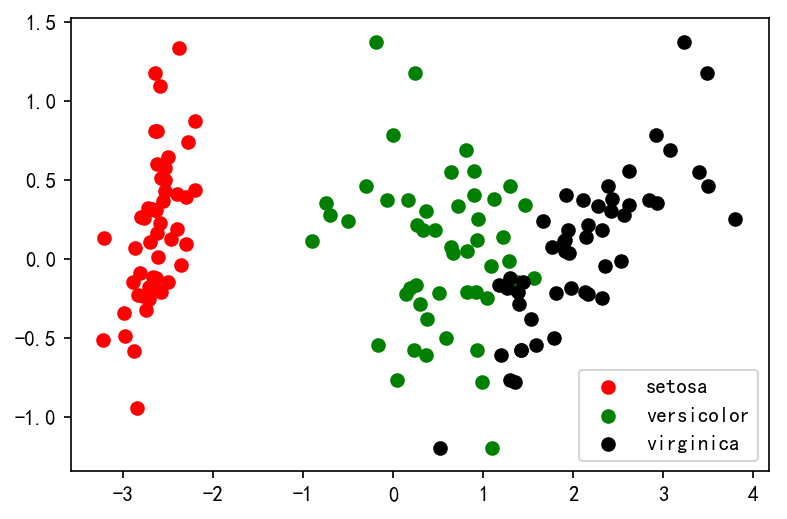

In [33]:
plt.figure()
plt.scatter(X_dr[y==0, 0], X_dr[y==0, 1], c='red', label=iris.target_names[0])  # y有3中类型
plt.scatter(X_dr[y==1, 0], X_dr[y==2, 1], c='green', label=iris.target_names[1])
plt.scatter(X_dr[y==2, 0], X_dr[y==2, 1], c='black', label=iris.target_names[2])
plt.legend()
plt.show()

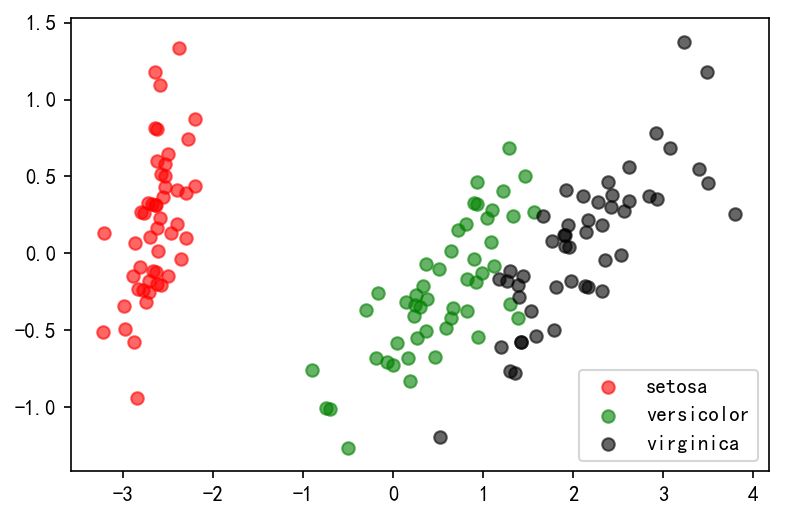

In [35]:
# 使用循环实现
fig = plt.figure()
colors = ['red', 'green', 'black']
labels = iris.target_names
for i in [0, 1, 2]: 
    plt.scatter(X_dr[y==i, 0], X_dr[y==i, 1], c=colors[i], label=labels[i], alpha=0.6)

plt.legend()
plt.show()

##### 使用seaborn进行可视化

In [59]:
import seaborn as sns
data = pd.concat([pd.DataFrame(X_dr), pd.DataFrame(y)], axis=1)
data.columns=['x', 'y', 'label']

D:\anaconda\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
D:\anaconda\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


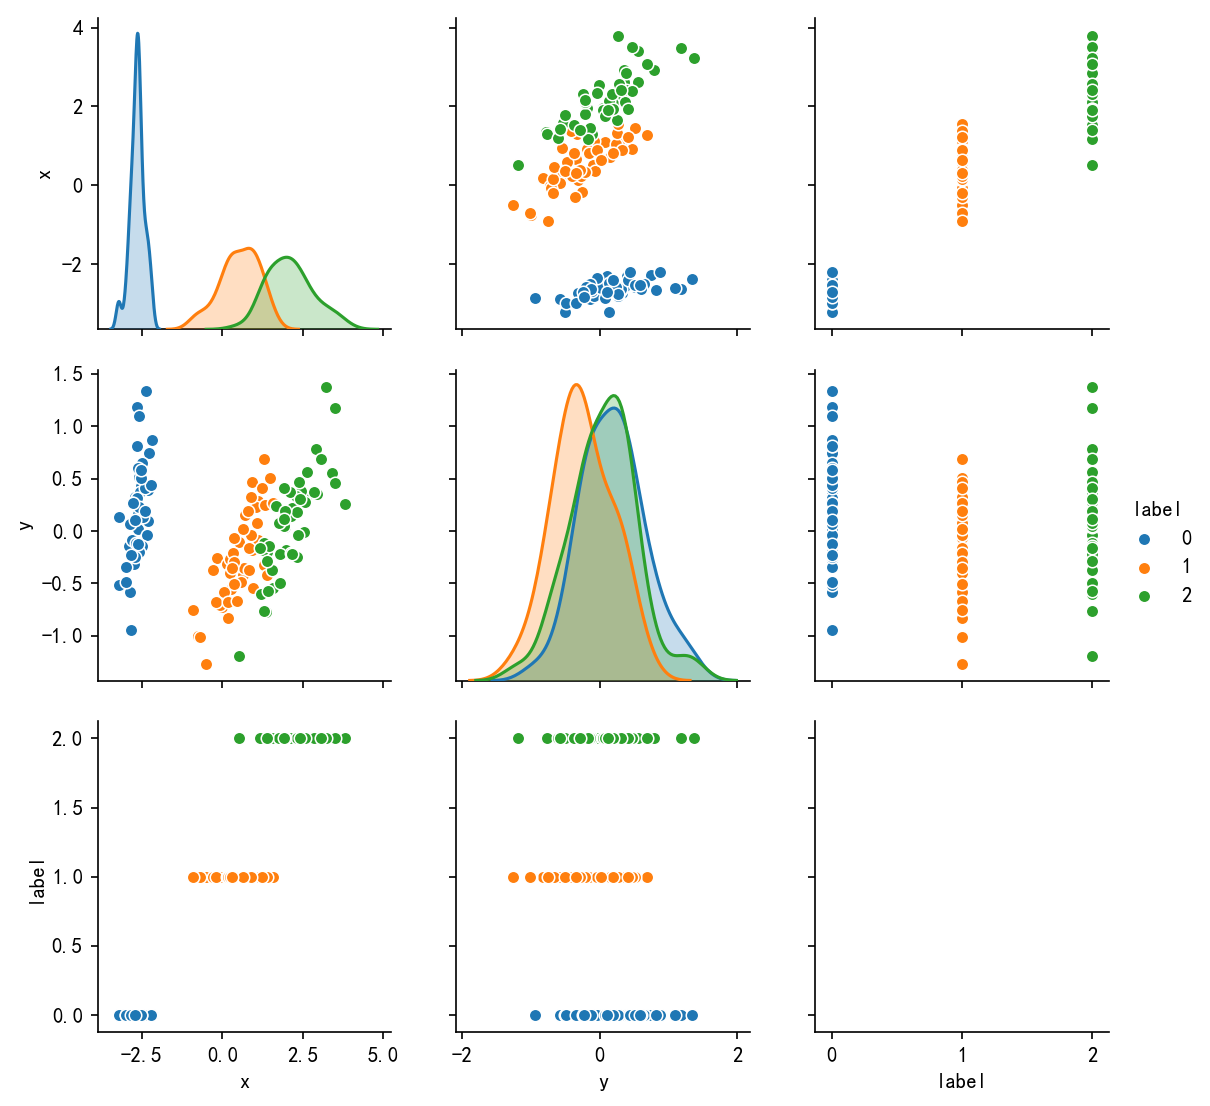

In [61]:
sns.pairplot(data, 'label')

##### 降维后的数据


In [65]:
pca.explained_variance_  # 可解释性方差

array([4.22824171, 0.24267075])

In [68]:
pca.explained_variance_ratio_  # 显示可解释性方差的贡献率

array([0.92461872, 0.05306648])

In [73]:
pca.explained_variance_ratio_.sum()

0.9776852063187949

##### 选出最好的n_components: 用累计可解释性方差贡献率

当参数n_components中不填写任何值，则默认返回min(X.shape)个特征，一般来说，样本量都会大于特征数目，
所以什么都不填就相当于转换了新特征空间，但没有减少特征的个数。一般来说，不会使用这种输入方式。但我们
却可以使用这种输入方式来画出累计可解释方差贡献率曲线，以此选择最好的n_components的整数取值。
累积可解释方差贡献率曲线是一条以降维后保留的特征个数为横坐标，降维后新特征矩阵捕捉到的可解释方差贡献
率为纵坐标的曲线，能够帮助我们决定n_components最好的取值。

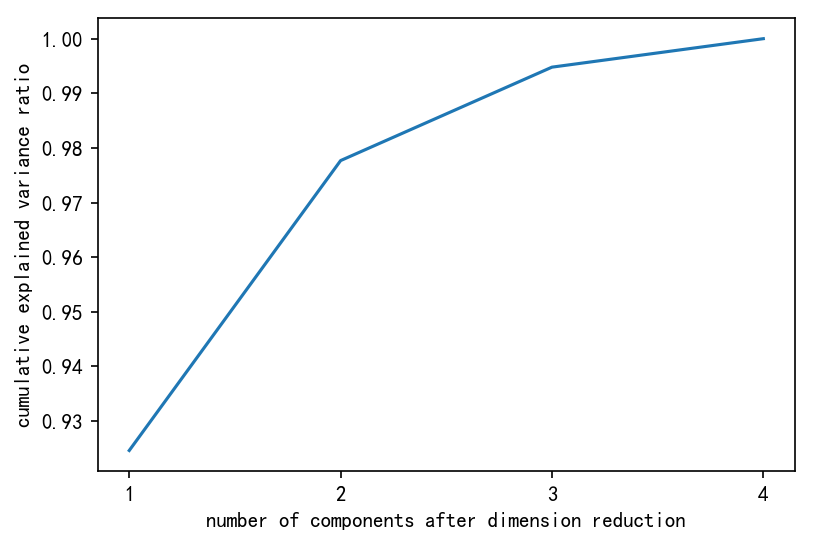

In [74]:
pca_line = PCA().fit(X)
plt.plot([1,2,3,4],np.cumsum(pca_line.explained_variance_ratio_))
plt.xticks([1,2,3,4]) #这是为了限制坐标轴显示为整数
plt.xlabel("number of components after dimension reduction")
plt.ylabel("cumulative explained variance ratio")
plt.show()

### 使用极大似然(maximum likelihood estimation)超参数  
极大似然估计法选择超参数是有代价的，他需要使用大量的计算

In [77]:
data = PCA(n_components='mle').fit_transform(X)  

In [79]:
data  # 极大似然估计给我们选出了3个特征

array([[-2.68412563,  0.31939725, -0.02791483],
       [-2.71414169, -0.17700123, -0.21046427],
       [-2.88899057, -0.14494943,  0.01790026],
       [-2.74534286, -0.31829898,  0.03155937],
       [-2.72871654,  0.32675451,  0.09007924],
       [-2.28085963,  0.74133045,  0.16867766],
       [-2.82053775, -0.08946138,  0.25789216],
       [-2.62614497,  0.16338496, -0.02187932],
       [-2.88638273, -0.57831175,  0.02075957],
       [-2.6727558 , -0.11377425, -0.19763272],
       [-2.50694709,  0.6450689 , -0.07531801],
       [-2.61275523,  0.01472994,  0.10215026],
       [-2.78610927, -0.235112  , -0.20684443],
       [-3.22380374, -0.51139459,  0.06129967],
       [-2.64475039,  1.17876464, -0.15162752],
       [-2.38603903,  1.33806233,  0.2777769 ],
       [-2.62352788,  0.81067951,  0.13818323],
       [-2.64829671,  0.31184914,  0.02666832],
       [-2.19982032,  0.87283904, -0.12030552],
       [-2.5879864 ,  0.51356031,  0.21366517],
       [-2.31025622,  0.39134594, -0.239

### 根据信息量占比选出超参数

例如：我们想保留含有样本超过97%的特征

In [82]:
pca = PCA(n_components=0.97).fit(X)
pca_per = pca.transform(X)

In [87]:
pca.explained_variance_ratio_.sum()

0.977685206318795

In [89]:
pca_per  # 根据输入的参数，sklearn为我们保留了两个特征

array([[-2.68412563,  0.31939725],
       [-2.71414169, -0.17700123],
       [-2.88899057, -0.14494943],
       [-2.74534286, -0.31829898],
       [-2.72871654,  0.32675451],
       [-2.28085963,  0.74133045],
       [-2.82053775, -0.08946138],
       [-2.62614497,  0.16338496],
       [-2.88638273, -0.57831175],
       [-2.6727558 , -0.11377425],
       [-2.50694709,  0.6450689 ],
       [-2.61275523,  0.01472994],
       [-2.78610927, -0.235112  ],
       [-3.22380374, -0.51139459],
       [-2.64475039,  1.17876464],
       [-2.38603903,  1.33806233],
       [-2.62352788,  0.81067951],
       [-2.64829671,  0.31184914],
       [-2.19982032,  0.87283904],
       [-2.5879864 ,  0.51356031],
       [-2.31025622,  0.39134594],
       [-2.54370523,  0.43299606],
       [-3.21593942,  0.13346807],
       [-2.30273318,  0.09870885],
       [-2.35575405, -0.03728186],
       [-2.50666891, -0.14601688],
       [-2.46882007,  0.13095149],
       [-2.56231991,  0.36771886],
       [-2.63953472,

## PCA中的SVD

### PCA中的SVD是从哪里来的？

PCA的参数中，有一个svd_solver(奇异值分解其)的超参数，可以让PCA实现奇异值分解。  
PCA和SVD都需要大量的计算。不同的是，SVD不需要计算特征之间的协方差，所以计算量会明显小于PCA。  
但同时，PCA与SVD的计算方法其实和类似，都是对矩阵进行分解。所以可以结合PCA与SVD一起实现一种新的降维算法。  

$$传统的SVD：X --> U\Sigma V^T   \\
    经过改造的SVD: X_{(m, n)} -->U\Sigma V_{(n, n)}^T  ---> V[:k]=V_{(k, n)} --> X_{(m, n)} * V_{(k, n)}^T  --> X_{dr(m, k)}
$$

也就是说，SVD绕过计算特征矩阵的协方差，在减少计算量的同时，实现降维。  
但是，要理解'奇异值'远比理解方差来的困难，所以，sklearn把降维流程分成两部分，  
1. 由奇异值分解实现计算特征空间V， 
2. 由主成分分析实现映射数据和求解特征矩阵。  


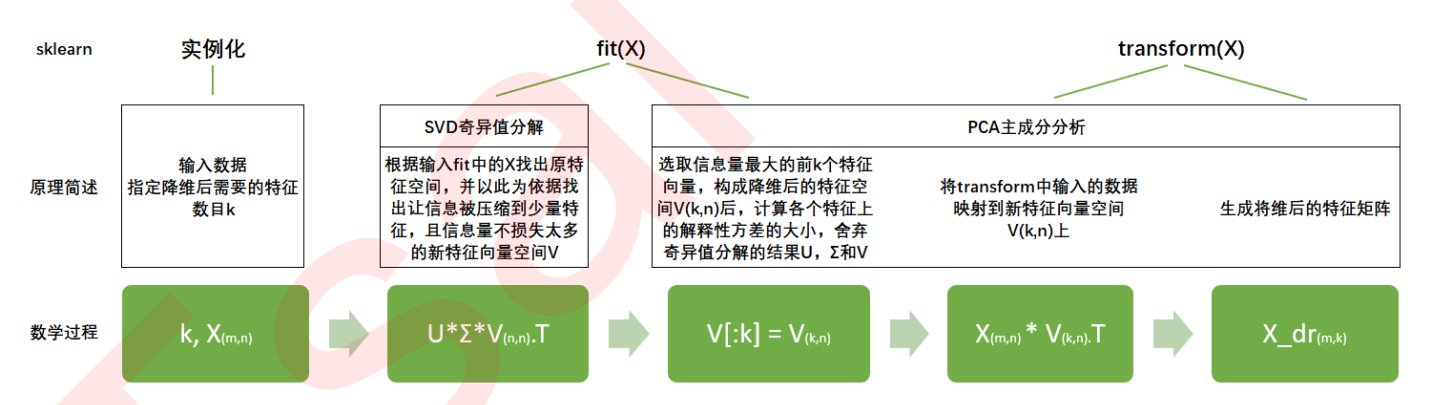


通过SVD和PCA的合作，
sklearn实现了一种计算更快更简单，但效果却很好的“合作降维“。很多人理解SVD，是把SVD当作PCA的一种求解
方法，其实指的就是在矩阵分解时不使用PCA本身的特征值分解，而使用奇异值分解来减少计算量。这种方法确实
存在，但在sklearn中，矩阵U和Σ虽然会被计算出来（同样也是一种比起PCA来说简化非常多的数学过程，不产生
协方差矩阵），但完全不会被用到，也无法调取查看或者使用，因此我们可以认为，U和Σ在fit过后就被遗弃了。奇
异值分解追求的仅仅是V，只要有了V，就可以计算出降维后的特征矩阵。在transform过程之后，fit中奇异值分解
的结果除了V(k,n)以外，就会被舍弃，而V(k,n)会被保存在属性components_ 当中，可以调用查看。

In [91]:
PCA(2).fit(X).components_  # 查看SVD后的特征矩阵

array([[ 0.36138659, -0.08452251,  0.85667061,  0.3582892 ],
       [ 0.65658877,  0.73016143, -0.17337266, -0.07548102]])

### 重要参数svd_solver与random_state

参数svd_solver是在降维过程中，用来控制矩阵分解的一些细节的参数。有四种模式可选："auto", "full", "arpack",
"randomized"，默认”auto"。

+ "auto"：基于X.shape和n_components的默认策略来选择分解器：如果输入数据的尺寸大于500x500且要提
取的特征数小于数据最小维度min(X.shape)的80％，就启用效率更高的”randomized“方法。否则，精确完整
的SVD将被计算，截断将会在矩阵被分解完成后有选择地发生  
+ "full"：从scipy.linalg.svd中调用标准的LAPACK分解器来生成精确完整的SVD，适合数据量比较适中，计算时
间充足的情况，生成的精确完整的SVD的结构为：  
$$U_{(m, m)}, \Sigma_{m, n}, V_{(n,n)}^T$$

+ "arpack"：从scipy.sparse.linalg.svds调用ARPACK分解器来运行截断奇异值分解(SVD truncated)，分解时就
将特征数量降到n_components中输入的数值k，可以加快运算速度，适合特征矩阵很大的时候，但一般用于
特征矩阵为稀疏矩阵的情况，此过程包含一定的随机性。截断后的SVD分解出的结构为：  
$$U_{(m, k)}, \Sigma_{k, k}, V_{(n,n)}^T$$

+ "randomized"，通过Halko等人的随机方法进行随机SVD。在"full"方法中，分解器会根据原始数据和输入的
n_components值去计算和寻找符合需求的新特征向量，但是在"randomized"方法中，分解器会先生成多个
随机向量，然后一一去检测这些随机向量中是否有任何一个符合我们的分解需求，如果符合，就保留这个随
机向量，并基于这个随机向量来构建后续的向量空间。这个方法已经被Halko等人证明，比"full"模式下计算快
很多，并且还能够保证模型运行效果。**适合特征矩阵巨大，计算量庞大的情况。**

### 重要属性components_

通常来说，在新的特征矩阵生成之前，我们无法知晓PCA都建立了怎样的新特征向量，新
特征矩阵生成之后也不具有可读性，我们无法判断新特征矩阵的特征是从原数据中的什么特征组合而来，新特征虽
然带有原始数据的信息，却已经不是原数据上代表着的含义了。  
但事实上，在矩阵分解的时候，PCA是有目标的：在原有特征的基础上，找出能够让信息尽量聚集的新特征向量。在
sklearn使用的PCA和SVD联合的降维方法中，这些新特征向量组成的新特征空间其实就是V(k,n)。当V(k,n)是数字
时，我们无法判断V(k,n)和原有的特征究竟有着怎样千丝万缕的数学联系。但是，如果原特征矩阵是图像，V(k,n)这
个空间矩阵也可以被可视化的话

In [92]:
from sklearn.datasets import fetch_lfw_people
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt 
import numpy as np

In [126]:
faces = fetch_lfw_people(min_faces_per_person=60)

In [128]:
faces.images.shape  # 1348张62x47的图片

(1348, 62, 47)

In [147]:
X_faces = faces.data
y_faces = faces.target
X_faces.shape

(1348, 2914)

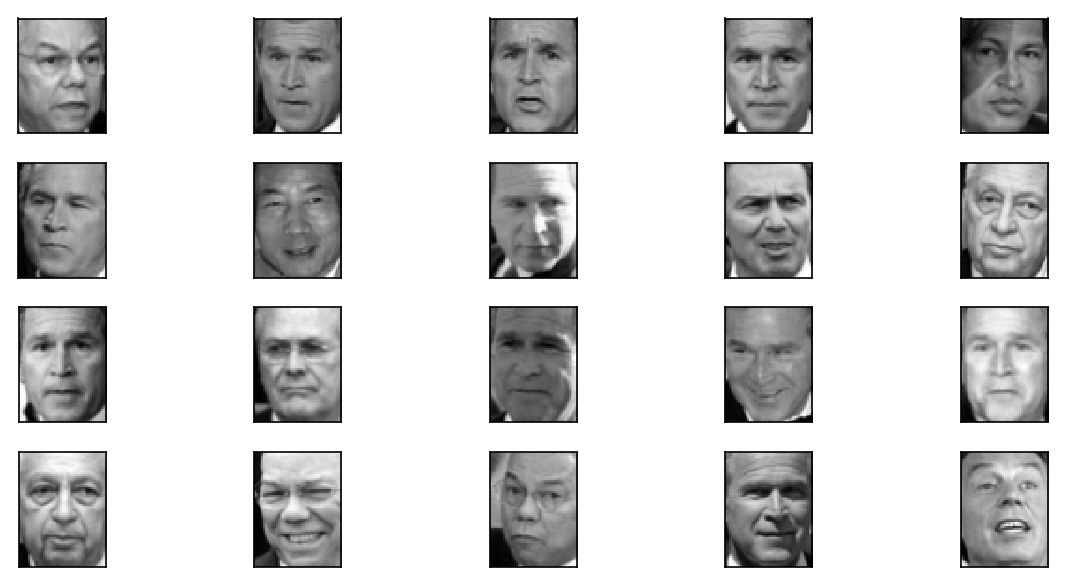

In [139]:
fig, axes = plt.subplots(4, 5, figsize=(8,4), subplot_kw={"xticks":[], 'yticks':[]})
fig.tight_layout()
for i, ax in enumerate(axes.flat):
    ax.imshow(faces.images[i,:,:], cmap='gray')


##### 降维后，查看器特征空间

In [143]:
pca = PCA(n_components=0.9).fit(X_faces)

In [144]:
pca_faces = pca.transform(X_faces)
pca_faces.shape

(1348, 84)

In [148]:
# 查看降维的向量V
V = pca.components_
V.shape

(84, 2914)

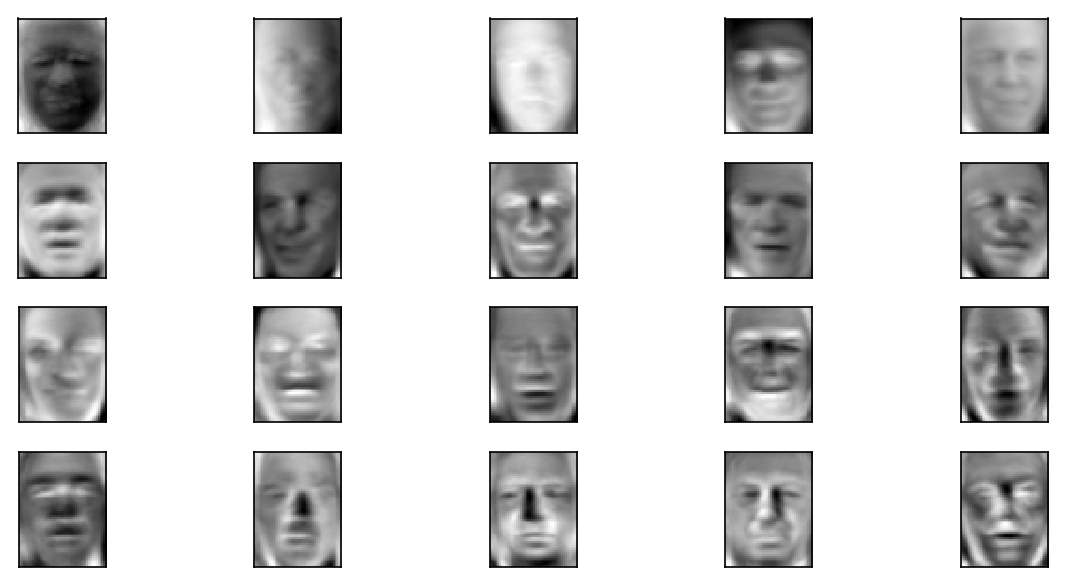

In [149]:
fig, axes = plt.subplots(4, 5, figsize=(8,4), subplot_kw={"xticks":[], 'yticks':[]})
fig.tight_layout()
for i, ax in enumerate(axes.flat):
    ax.imshow(V[i].reshape(62, 47), cmap='gray')


可以看到，PCA提取人脸的主要信息是鼻子，嘴巴，眼睛。虽然PCA降维后的数据不知含有什么信息，但是在通过图片可视化，我们明显可以看到PCA在图片提取的信息是什么。

## 重要接口inverse_transform

### 示例：还原我们降维后的图片

In [151]:
pca_inverse_faces = pca.inverse_transform(pca_faces)
pca_inverse_faces.shape

(1348, 2914)

##### 我们取其中的几张图片与原图进行对比

(2, 10)


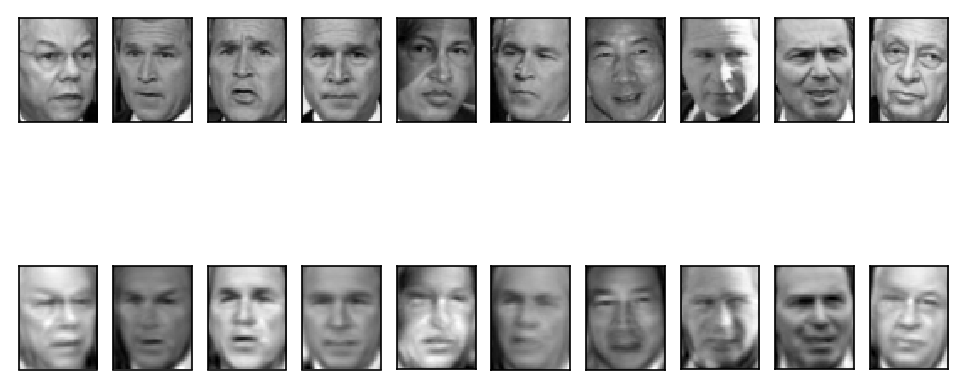

In [158]:
fig, axes = plt.subplots(2, 10, figsize=(8,4), subplot_kw={"xticks":[], 'yticks':[]})
print(axes.shape)
for i in range(10):
    pass
    axes[0,i].imshow(faces.images[i], cmap='gray')
    axes[1,i].imshow(pca_inverse_faces[i].reshape(62,47),cmap='gray')

可以看到即便把数据复原，数据并不能与原先的数据一模一样，这是因为**PCA丢弃的信息就根本找不回来**了。

### 示例： 用PCA过滤噪音

In [95]:
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [97]:
digits = load_digits()
X_digits = digits.data
y_digits = digits.target

In [101]:
digits.images.shape

(1797, 8, 8)

In [99]:
X_digits.shape

(1797, 64)

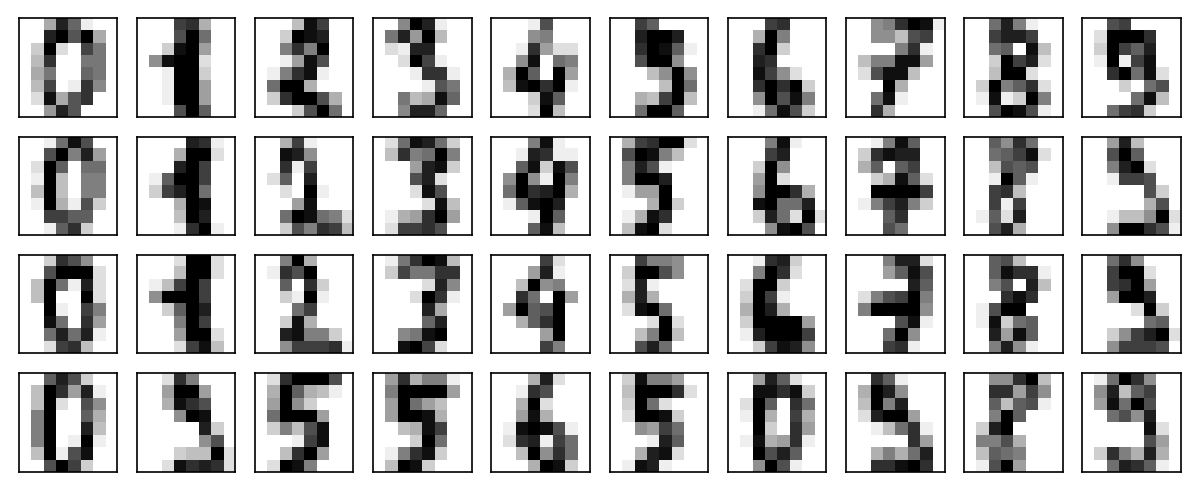

In [103]:
"""定义绘图函数"""
def plot_digits(data):
    fig, axes = plt.subplots(4, 10, figsize=(10, 4), 
                            subplot_kw={'xticks':[], 'yticks':[]})
    
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8,8), cmap='binary')
plot_digits(X_digits)

In [106]:
np.random.RandomState(42)

# 在指定的数据集中，随机抽取服从正态分布的数据
# 两个参数，分别是指定的数据集，和抽取出来的正态分布的方差
noisy = np.random.normal(digits.data, 2)

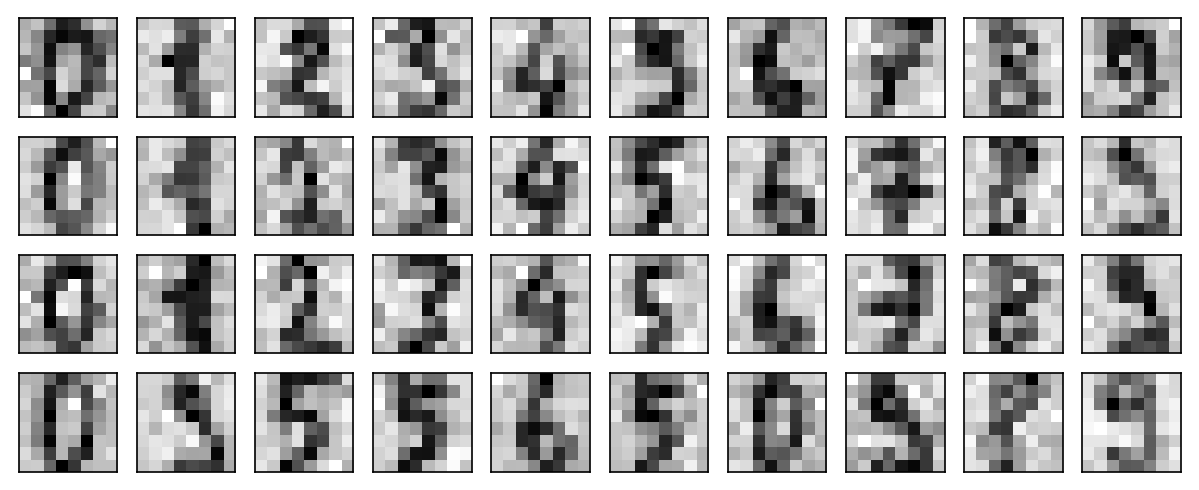

In [108]:
plot_digits(noisy)

In [113]:
"""使用PCA降维"""
pca = PCA(n_components=0.7).fit(noisy)
pca_noisy = pca.transform(noisy)

In [114]:
pca_noisy.shape

(1797, 14)

In [115]:
# plot_digits(pca_noisy)  这里需要将数据恢复，否则无法画出图像

##### 使用inverse_transform升维

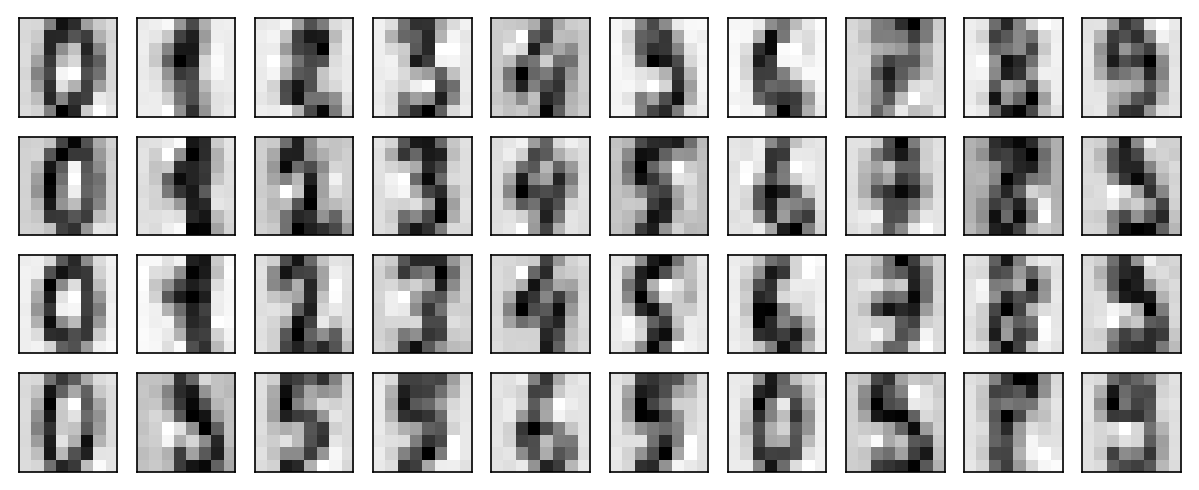

In [117]:
without_noisy = pca.inverse_transform(pca_noisy)
plot_digits(without_noisy)

对比上面的图片，我们可以看到inverse_transform后的图片明显少了很多噪音点

# 示例：PCA对手写数据集降维

In [12]:
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA 
from sklearn.ensemble import RandomForestClassifier as RFC
import numpy as py 
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi']=150

In [2]:
data = pd.read_csv('data/digit recognizor.csv')
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
X = data.iloc[:,1:]
y = data.iloc[:,0]

In [6]:
pca = PCA().fit(X)
# pca_data = pca.transform(X)

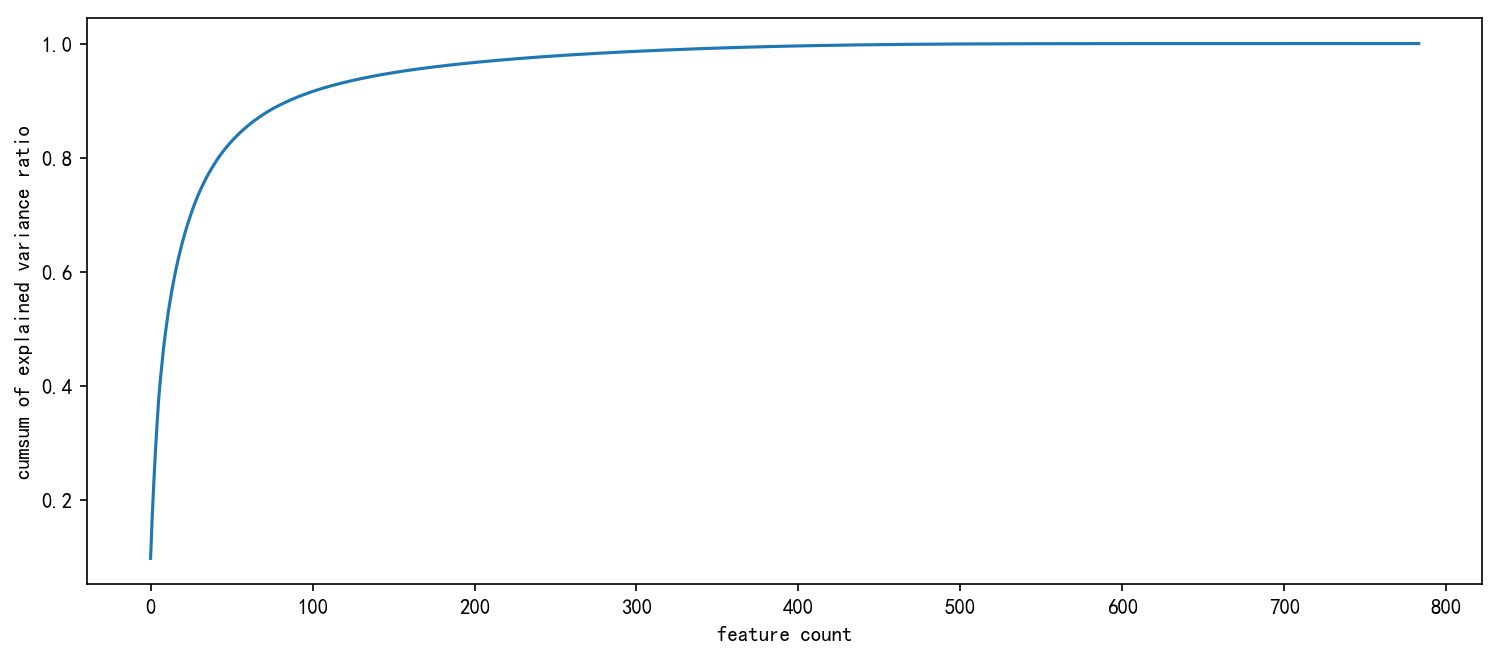

In [10]:
# 画出累计可解释方差，找出最佳参数。  
evr = np.cumsum(pca.explained_variance_ratio_)
fig = plt.figure(figsize=(12,5))
plt.plot(range(len(evr)), evr)
plt.xlabel('feature count')
plt.ylabel('cumsum of explained variance ratio')
plt.show()

可以看到，n_estimators 在1， 100会有一个转折点，而这个转折点对应的参数就是我们想要的。

In [14]:
"""再次细化模型， 并且直接跑模型"""
scores = []
for i in range(1, 101, 10):
    data = PCA(n_components=i).fit_transform(X)
    score = cross_val_score(RFC(n_estimators=10, random_state=1), data, y, cv=5).mean()
    scores.append(score)

![](images/4_pca_rfc.png)

可以看到n_estimators在16-30左右可以达到最高分。  

In [ ]:
"""再次细化我们的学习曲线"""

scores = []
for i in range(16, 30):
    data = PCA(n_components=i).fit_transform(X)
    score = cross_val_score(RFC(n_estimators=10, random_state=1), data, y, cv=5).mean()
    scores.append(score)

In [ ]:
plt.figure(figsize=[20, 5])
plt.plot(range(16, 30), scores)
plt.show()

In [21]:
"""根据返回的数据，重新调整我们的参数"""
X_pca = PCA(n_components=65).fit_transform(X)

rfc = RFC(n_estimators=100)
rfc_score = cross_val_score(rfc, X_pca, y, cv=10).mean()
print(rfc_score)

0.9488343533349439


![](images/4_pca_rfc2.2.png)

找到我们的最佳参数n_components=27，运行模型

In [25]:
pca = PCA(n_components=27).fit(X)

In [27]:
np.sum(pca.explained_variance_ratio_)  # 从结果上看，数据的70%就能跑出很好的模型

0.7098117101925321

In [28]:
X_pca = pca.transform(X)

In [29]:
X_pca.shape

(42000, 27)

##### 利用降维后的数据，用随机森林运行模型

In [30]:
scores = cross_val_score(RFC(n_estimators=100,random_state=1), X_pca, y, cv=10).mean()

In [31]:
print(scores)

0.9475484171957043


利用降维后的数据(27维)，我们用随机森林跑出0.947分，如果我们想继续提高模型的准确率，我们可以对随机森林进行调参。  
但是，我们也可以换模型，在这个示例中，数据已经被我们降到27维，我们完全可以试着用KNN跑一下模型。  

In [ ]:
from  sklearn.neighbors import KNeighborsClassifier as KNN
score_KNN = cross_val_score(KNN(n_neighbors=5, n_jobs=-1), X_pca, y, cv=5).mean()

In [ ]:
"""调整KNN的参数"""
scores_KNN = []
for i in range(1, 10):
    score_KNN = cross_val_score(KNN(i, n_jobs=-1), X_pca, y, cv=5).mean()
    scores_KNN.append(score_KNN)
    

In [ ]:
fig = plt.figure()
plt.plot(range(1, 10), scores_KNN)
plt.show()

![](images/4_scores_KNN.png)

可以看到KNN在n_neighbors=5时，模型已经很不错了，达到0.97左右的分数

修改PCA n_components，试试看KNN能否更进一层。  


In [ ]:
scores_KNN = [] 
for i in range(20, 28): 
        X_pca = PCA(n_components=i).fit_transform(X) 
        score = cross_val_score(KNN(n_neighbors=5, n_jobs=-1), X_pca, y, c
    v=5).mean() 
        scores_KNN.append(score) 

In [ ]:
fig = plt.figure()
plt.plot(range(20, 28), scores_KNN)
plt.xticks(range(20, 28))
plt.show()


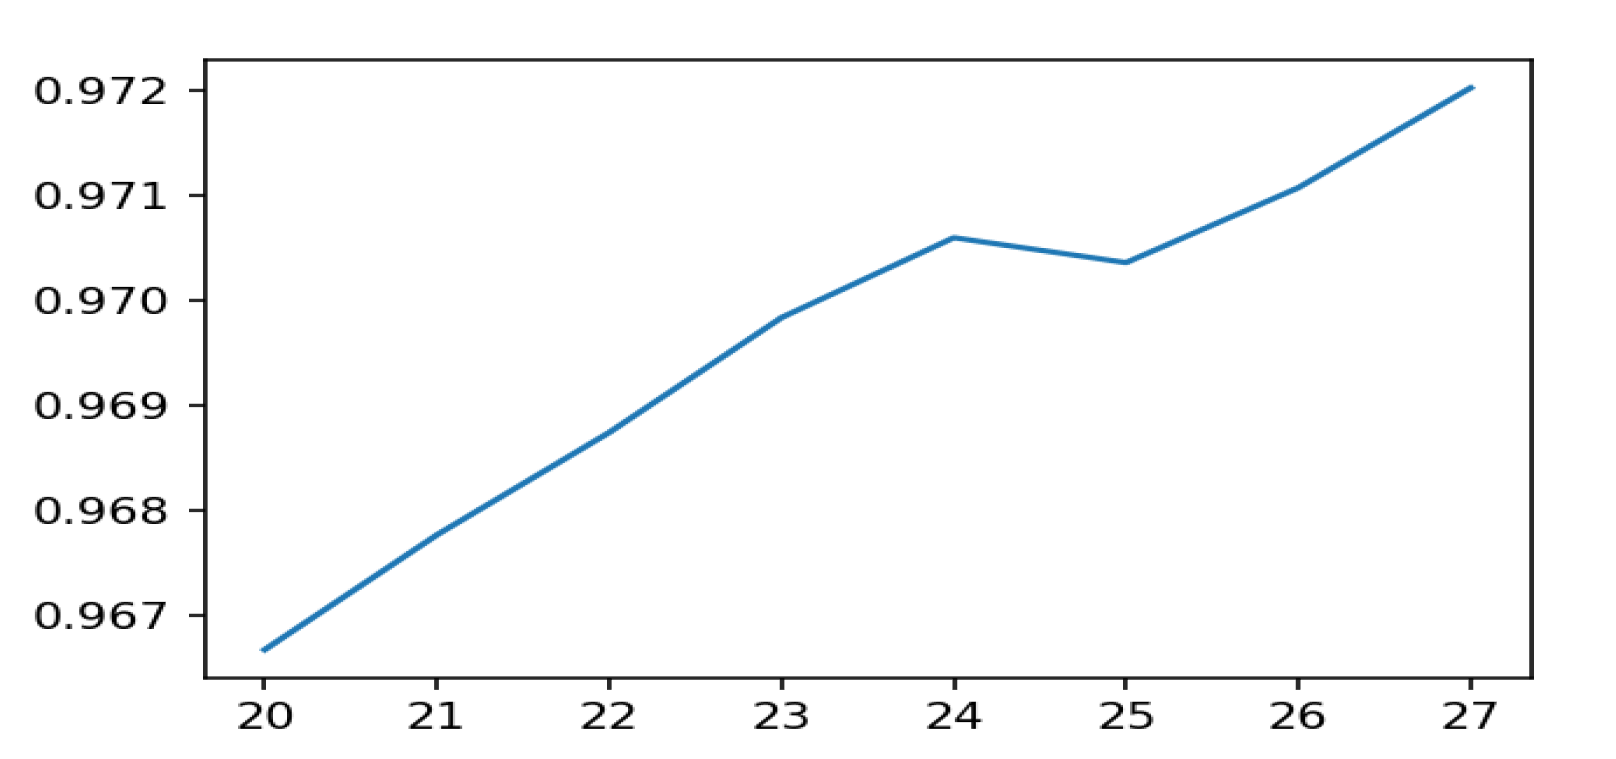

In [ ]:
scores_KNN = [] 
for i in range(27, 35): 
        X_pca = PCA(n_components=i).fit_transform(X) 
        score = cross_val_score(KNN(n_neighbors=5, n_jobs=-1), X_pca, y, c
    v=5).mean() 
        scores_KNN.append(score) 

In [ ]:
fig = plt.figure()
plt.plot(range(27, 35), scores_KNN)
plt.show()

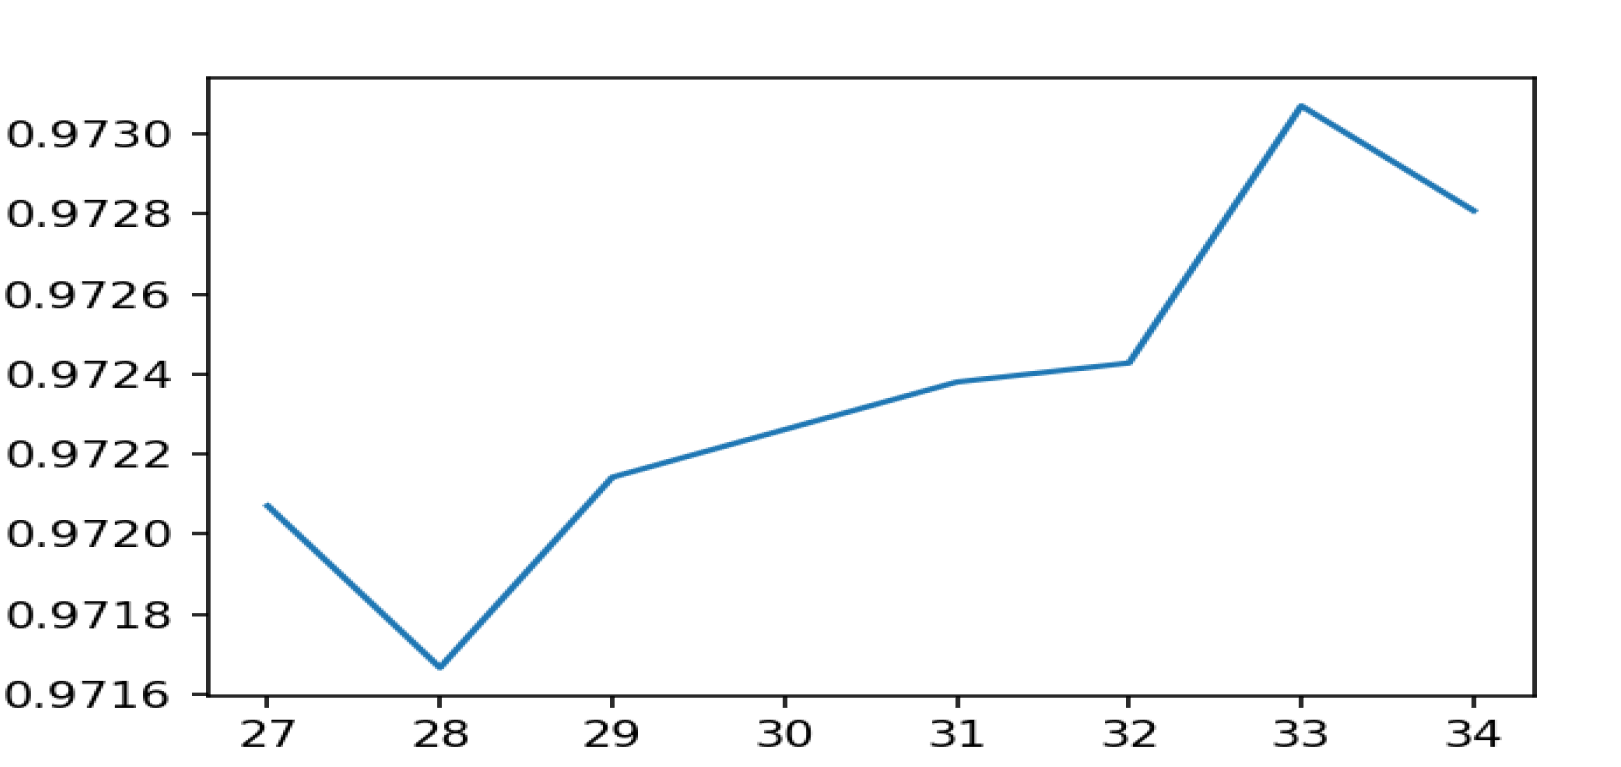